In [1]:
# https://stable-baselines3.readthedocs.io/en/master/guide/rl.html
# https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html#a-taxonomy-of-rl-algorithms

### Reinforcement learning: It focuses on teaching agents through trial and error

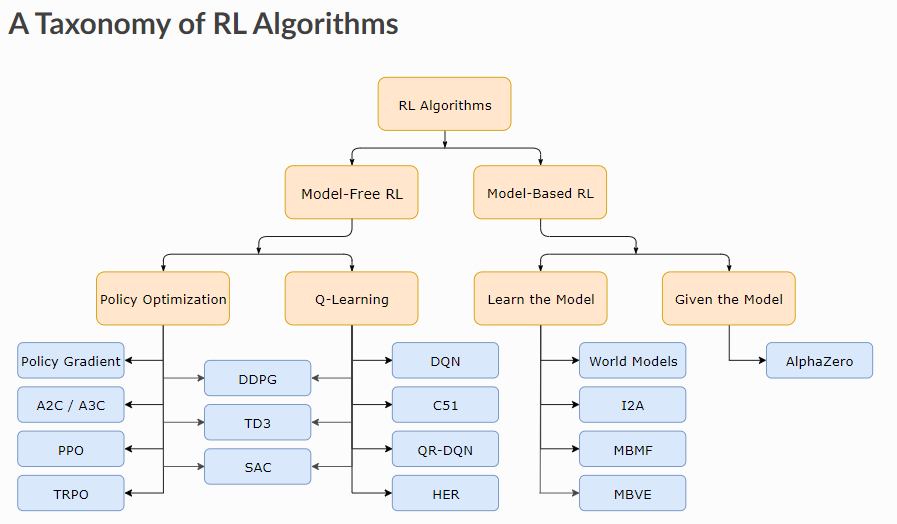

### Basic Steps to Develope a RL model
- Import Dependencies
- Load the Environment
- Train a RL model
- Save and Reload the model
- Evaluate and Test the model

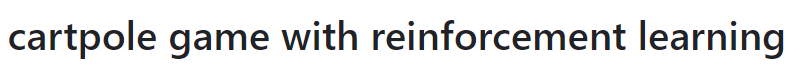

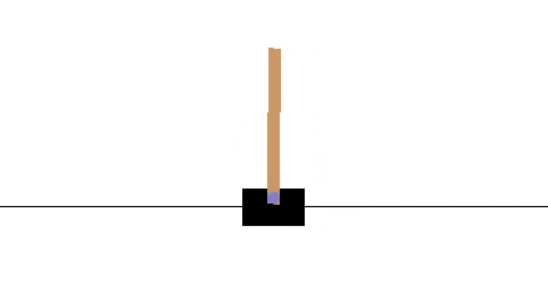

## Algorithm used in cartpole

- PPO (Proximal Policy Optimization): Here new policy should be not too far from the old policy. For that, ppo uses clipping to avoid too large update.

- DQN (Deep Q Network): It is builds on Fitted Q-Iteration (FQI) and make use of different tricks to stabilize the learning with neural networks: it uses a replay buffer, a target network and gradient clipping.

# 1. Import dependencies

In [2]:
''' Stable Baseline3  is a set of reliable implementations
of reinforcement learning algorithms in PyTorch.'''

!pip install stable-baselines3[extra]

In [3]:
# OpenAI Gymnasium is an environment for developing and testing learning agents.

!pip install gym

In [4]:
# import required library

import os
import gym 
from stable_baselines3 import PPO

# stable baseline3 is allow vectorize environment in which agent learn on more than one environment at the same time
from stable_baselines3.common.vec_env import DummyVecEnv
# for test the model performance
from stable_baselines3.common.evaluation import evaluate_policy

import warnings
warnings.filterwarnings("ignore")

# 2. Load Environment

### Types of OpenAI Gym spaces

- Box: n dimensional tensor, range of values e.g, Box(0,1,shape=(3,3))
- Discrete: set of items e.g, Discrete (3)
- Tuple: tuple of other spaces e.g, Box or Discrete
- Dict: Dictionary of spaces e.g, Box or Discrete
- MultiBinary: One hot encoded binary values e.g, MultiBinary(4)
- MultiDiscrete: Multiple discrete values e.g, MultiDiscrete([5,2,2])

In [5]:
environment_name = "CartPole-v1"

In [6]:
env = gym.make(environment_name)

### Episodes
- Episodes means one full game within the environment.
- Some environment have  fixed episodes length e.g, CartPole is 200 frames

In [7]:
episodes = 5

for episode in range(1, episodes + 1):
    state = env.reset()  # initial set of observation
    done = False
    score = 0 
    
    while not done:
        env.render()    # display the environment
        action = env.action_space.sample()
        step_result = env.step(action)
        
        # Unpack the first four elements, ignore the rest
        n_state, reward, done, info, _ = step_result
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

env.close()


Episode:1 Score:15.0
Episode:2 Score:20.0
Episode:3 Score:20.0
Episode:4 Score:13.0
Episode:5 Score:35.0


### Understanding The Environment
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

### Environment Functions

- env.reset(): reset the env and obtain initial observations
- env.render(): visualise the environment
- env.step(): apply an action to the environment
- env.close(): close down the render frame

In [8]:
# initial set of observation

env.reset()

(array([ 0.01810781, -0.02352295, -0.0479526 , -0.01671788], dtype=float32),
 {})

In [9]:
# Action space is '0' or '1'

env.action_space

Discrete(2)

In [10]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

1

In [11]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [12]:
# [cart position[-4.8,4.8], cart velocity[-Inf,Inf], pole angle[-24,24], pole angular velocity[-Inf,Inf]]
env.observation_space.sample()

array([4.3198609e+00, 3.0313950e+36, 2.5496966e-01, 5.8388478e+37],
      dtype=float32)

In [13]:
env.step(1)

(array([ 0.01763736,  0.17225273, -0.04828696, -0.3241365 ], dtype=float32),
 1.0,
 False,
 False,
 {})

### Algorithm used based on action

- Discrete Single Process: DQN
- Discrete Multi Processed: PPO or A2C
- Continuous Single Process: SAC or TD3
- Continuous Multi Processed: PPO or A2C

# 3. Train an RL Model

In [14]:
log_path=os.path.join('Training','Logs')

In [15]:
log_path

'Training\\Logs'

In [16]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1,tensorboard_log=log_path)

Using cpu device


In [17]:
# PPO??

- Stable Baselines has three policy:
    - MlpPolicy
    - CnnPolicy
    - MultiInputPolicy

### Training Metrics

- Evaluation Metrics:
    - Ep_len_mean: On average how long a particular episodes lasted before done 
    - ep_rew_mean: The average reward that the agent accumulated per episode
- Time Metrics: fps, iteration, time_elapsed, total_timesteps
- Loss Metrics: Entropy_loss, policy_loss, value_loss
- other Metrics: Explained_variance, Learning_rate, n_updates

In [18]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_22
-----------------------------
| time/              |      |
|    fps             | 1306 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 603          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0076168072 |
|    clip_fraction        | 0.0836       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | -0.00128     |
|    learning_rate        | 0.0003       |
|    loss                 | 6.1          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0133      |
|    value_loss           | 57.4         |
---------------------------

# 4. Save and Reload Model

In [19]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')

In [20]:
model.save(PPO_path)

In [21]:
PPO_path

'Training\\Saved Models\\PPO_model'

In [22]:
del model

In [23]:
model = PPO.load(PPO_path, env=env)

In [24]:
model.learn(total_timesteps=1000)

Logging to Training\Logs\PPO_23
-----------------------------
| time/              |      |
|    fps             | 1356 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------


# 5. Evaluation

In [25]:
from stable_baselines3.common.evaluation import evaluate_policy
evaluate_policy(model, env, n_eval_episodes=10, render=True)
# return average reward and standard deviation

(500.0, 0.0)

In [26]:
env.close()

### CartPole Reward
- Reward for CartPole is calculated as 1 point for every step that the pole remains upright (with a max of 200 steps).
- If the pole is more than 15 degree from vertical of the cart moves more than 2.4 units from center the episode ends.

# 6. Test Model

In [27]:
episodes = 5
for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action, _ = model.predict(obs) # now using model here
        step_result = env.step(action)
        
        obs, reward, done, info = step_result
        score += reward
    
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:[417.]
Episode:2 Score:[500.]
Episode:3 Score:[500.]
Episode:4 Score:[500.]
Episode:5 Score:[500.]


In [28]:
env.close()

In [29]:
obs=env.reset()

In [30]:
obs

array([[-0.00861919,  0.01568833, -0.02773277, -0.01134792]],
      dtype=float32)

In [31]:
action, _ = model.predict(obs)

In [32]:
env.action_space.sample()

1

In [33]:
env.step(action)

(array([[-0.00830543, -0.17902514, -0.02795972,  0.2724576 ]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{'TimeLimit.truncated': False}])

In [34]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: 
        print('info', info)
        break

info [{'TimeLimit.truncated': True, 'terminal_observation': array([-2.015728  , -0.77331656, -0.01399947,  0.00825562], dtype=float32)}]


In [35]:
env.close()

# 7. Viewing Logs in Tensorboard

In [36]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [37]:
training_log_path

'Training\\Logs\\PPO_2'

In [38]:
# !tensorboard --logdir={training_log_path}

# 8. Adding a callback to the training Stage

In [39]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [40]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [41]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [42]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [43]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [44]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_24
-----------------------------
| time/              |      |
|    fps             | 1350 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 669         |
|    iterations           | 2           |
|    time_elapsed         | 6           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008239731 |
|    clip_fraction        | 0.0996      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00204    |
|    learning_rate        | 0.0003      |
|    loss                 | 5.43        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 59.4        |
-----------------------------------------
--

In [45]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [46]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(321.1, 134.35434492415942)

In [47]:
env.close()

# 9. Changing Policies

In [48]:
# new neural netwok architecture define
net_arch=[dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [49]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path, policy_kwargs={'net_arch': net_arch})

Using cpu device


In [50]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_25
-----------------------------
| time/              |      |
|    fps             | 1076 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 523         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015874447 |
|    clip_fraction        | 0.23        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.00513     |
|    learning_rate        | 0.0003      |
|    loss                 | 2.82        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0251     |
|    value_loss           | 18.4        |
-----------------------------------------
--

# 10. Using an Alternate Algorithm

In [51]:
from stable_baselines3 import DQN

In [52]:
model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [53]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\DQN_5
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3263     |
|    time_elapsed     | 0        |
|    total_timesteps  | 51       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8383     |
|    time_elapsed     | 0        |
|    total_timesteps  | 131      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 7808     |
|    time_elapsed     | 0        |
|    total_timesteps  | 244      |
----------------------------------
------------------------

In [54]:
dqn_path = os.path.join('Training', 'Saved Models', 'DQN_model')

In [55]:
model.save(dqn_path)

In [56]:
model = DQN.load(dqn_path, env=env)

In [57]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(9.0, 0.7745966692414834)

In [58]:
env.close()